In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
# Import the 'friends' dataset
path = '../../data/friends.csv'
friends = pd.read_csv(path)

In [3]:
# Take a look at the data
friends.head()

,gender,friends
0,FEMALE,466
1,MALE,323
2,MALE,336
3,FEMALE,1
4,FEMALE,50


This data comes from a random sample of users of our fake social networking website. For each user, we have their gender and the number of friends they have on the site. **We want to figure out if men have more friends, on average, than women, at a 95% confidence level.**

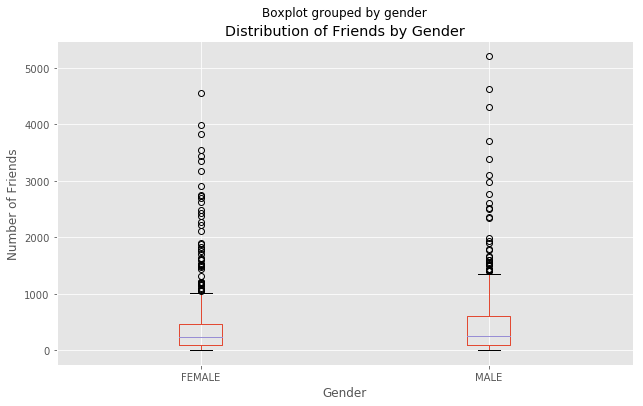

In [4]:
# Plot the distribution of the data. Choose whichever graph you feel is most appropriate.
friends.boxplot(by='gender', figsize=(10,6))

plt.title('Distribution of Friends by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Friends')

In [5]:
# Compute a bootstrap for MALE
male = friends[friends.gender == 'MALE'].friends
male_mean = male.mean()
male_boot = pd.DataFrame(np.random.choice(male, replace=True, size=(male.size, 10000)))

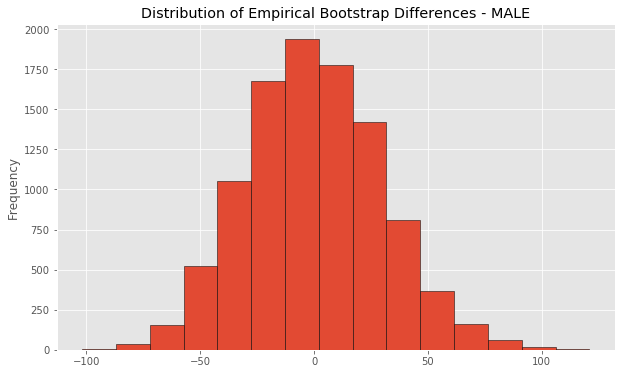

In [11]:
# Plot the distribution of the deltas
male_diff = male_boot.mean() - male_mean
male_diff.plot(
    kind='hist', 
    figsize=(10,6), 
    ec='black',
    bins=15,
)

plt.title('Distribution of Empirical Bootstrap Differences - MALE')

In [23]:
print '95% Confidence Interval for Male:', (male_mean + male_diff.quantile(0.1), male_mean + male_diff.quantile(0.9))

95% Confidence Interval for Male: (441.34120171673817, 517.5731759656652)


In [15]:
# Compute a bootstrap for FEMALE
female = friends[friends.gender == 'FEMALE'].friends
female_mean = female.mean()
female_boot = pd.DataFrame(np.random.choice(female, replace=True, size=(female.size, 10000)))

In [ ]:
# Plot the distribution of the deltas
female_diff = female_boot.mean() - female_mean
female_diff.plot(
    kind='hist', 
    figsize=(10,6), 
    ec='black',
    bins=15,
)

plt.title('Distribution of Empirical Bootstrap Differences - FEMALE')

In [24]:
print '95% Confidence Interval for Female:', (female_mean + female_diff.quantile(0.1), female_mean + female_diff.quantile(0.9))

95% Confidence Interval for Female: (381.4616104868914, 447.53277153558054)


In [26]:
friends.groupby('gender').mean()

,friends
gender,
FEMALE,414.245
MALE,478.931


In [27]:
housing = pd.read_csv('../../data/housing_prices.csv')

In [32]:
housing.colu

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
housing['LotSize'] = housing['LotArea'].map(lambda x: 'Small' if x < 10000 else 'Large')

In [47]:
from scipy.stats.mstats import winsorize

In [50]:
small = housing[housing.LotSize == 'Small']['SalePrice']
small = winsorize(small, limits=(None, 0.01))

In [51]:
large = housing[housing.LotSize == 'Large']['SalePrice']
large = winsorize(large, limits=(None, 0.01))